In [1]:
def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

ticker = 'SPY'
start_date = "2013-01-01"
end_date = "2024-01-01"
data = load_data(ticker, start_date, end_date)

NameError: name 'yf' is not defined

In [3]:
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.6 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp312-cp312-macosx_11_0_arm64.whl size=264320 sha256=8fd4252d745347d9d4356c81674a7af5e496010118b6dada7be77c46d63e13fa
  Stored in directory: /Users/abenovaraushan/Library/Caches/pip/wheels/43/ef/2d/2c51d496bf084945ffdf838b4cc8767b8ba1cc20eb41588831
Successfully built peewee
Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf

In [9]:
import yfinance as yf

def load_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    return data['Close']

ticker = "AAPL"  # Example ticker
start_date = "2013-01-01"
end_date = "2024-01-01"
data = load_data(ticker, start_date, end_date)

print(data) # Or do something else with the data

[*********************100%***********************]  1 of 1 completed

Ticker            AAPL
Date                  
2013-01-02   16.669014
2013-01-03   16.458612
2013-01-04   16.000160
2013-01-07   15.906039
2013-01-08   15.948849
...                ...
2023-12-22  192.444595
2023-12-26  191.897873
2023-12-27  191.997269
2023-12-28  192.424698
2023-12-29  191.380951

[2768 rows x 1 columns]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2013-01-02 to 2023-12-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2768 non-null   float64
dtypes: float64(1)
memory usage: 43.2 KB


In [15]:
data.describe()

Ticker,AAPL
count,2768.000000
mean,69.979286
std,56.556041
min,11.925920
25%,25.033383
50%,41.667305
75%,126.894945
max,196.927689


In [17]:
data.head(10)

Ticker,AAPL
Date,
2013-01-02,16.669014
2013-01-03,16.458612
2013-01-04,16.000160
2013-01-07,15.906039
2013-01-08,15.948849
2013-01-09,15.699591
2013-01-10,15.894205
2013-01-11,15.796751
2013-01-14,15.233546


In [21]:
print(data.columns) 

Index(['AAPL'], dtype='object', name='Ticker')


In [25]:
import yfinance as yf
import pandas as pd

ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-01-10")

# Add a 'Ticker' column:
data['Ticker'] = ticker  # Add the ticker symbol as a column
# Reset the index if you want ticker to be a regular column and not the index
data = data.reset_index()

X = data['Ticker']  # Now you can access it
print(X)

[*********************100%***********************]  1 of 1 completed

0    AAPL
1    AAPL
2    AAPL
3    AAPL
4    AAPL
Name: Ticker, dtype: object


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


# Suppose 'Channel' is the target variable I want to predict
X = data['Ticker']  # Features
y = data['Date']  # Target variable

print(X, y)

0    AAPL
1    AAPL
2    AAPL
3    AAPL
4    AAPL
Name: Ticker, dtype: object 0   2023-01-03
1   2023-01-04
2   2023-01-05
3   2023-01-06
4   2023-01-09
Name: Date, dtype: datetime64[ns]


In [33]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5,), (5,), (4,), (1,), (4,), (1,))

In [37]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  # Example regression model
from sklearn.metrics import mean_squared_error

ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-01-10")

# Feature 
data['Close_Lag1'] = data['Close'].shift(1)  # Closing price from yesterday
data = data.dropna()  # Remove rows with NaN values created by lagging

# Target Variable
y = data['Close']  # Predict the 'Close' price

# Features (example)
X = data[['Close_Lag1']]  # Using lagged close price as a feature

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

[*********************100%***********************]  1 of 1 completed

Mean Squared Error: 12.608159585566325


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 12.608159585566325
Root Mean Squared Error: 3.55079703525368
Mean Absolute Error: 3.55079703525368
R-squared: nan


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [53]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [55]:
ticker = "AAPL"
data = yf.download(ticker, start="2023-01-01", end="2023-01-10")

# Feature Engineering 
data['Close_Lag1'] = data['Close'].shift(1)  # Lagged closing price
data['Volume_Lag1'] = data['Volume'].shift(1) # Lagged Volume
data['Return'] = data['Close'].pct_change()  # Daily return

[*********************100%***********************]  1 of 1 completed


In [57]:
# Handle missing values (NaNs created by lagging)
data = data.dropna()  # Or use other imputation techniques if appropriate


In [59]:
# Target variable (example: predicting 'Close')
y = data['Close']

In [61]:
X = data[['Close_Lag1', 'Volume_Lag1', 'Return']]


In [63]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [67]:
ridge_reg = Ridge(alpha=1.0)  # Adjust alpha as needed
ridge_reg.fit(X_train, y_train)

Ridge()

In [69]:
lasso_reg = Lasso(alpha=1.0)  # Adjust alpha as needed
lasso_reg.fit(X_train, y_train)

Lasso()

In [71]:
y_pred_linear = linear_reg.predict(X_test)
y_pred_ridge = ridge_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)


In [73]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Model:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R-squared: {r2:.4f}")
    return mse, rmse, r2

In [75]:
mse_linear, rmse_linear, r2_linear = evaluate_model(y_test, y_pred_linear, "Linear Regression")
mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso, "Lasso Regression")


Linear Regression Model:
  MSE: 16.4730
  RMSE: 4.0587
  R-squared: nan
Ridge Regression Model:
  MSE: 16.5423
  RMSE: 4.0672
  R-squared: nan
Lasso Regression Model:
  MSE: 17.3137
  RMSE: 4.1610
  R-squared: nan


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


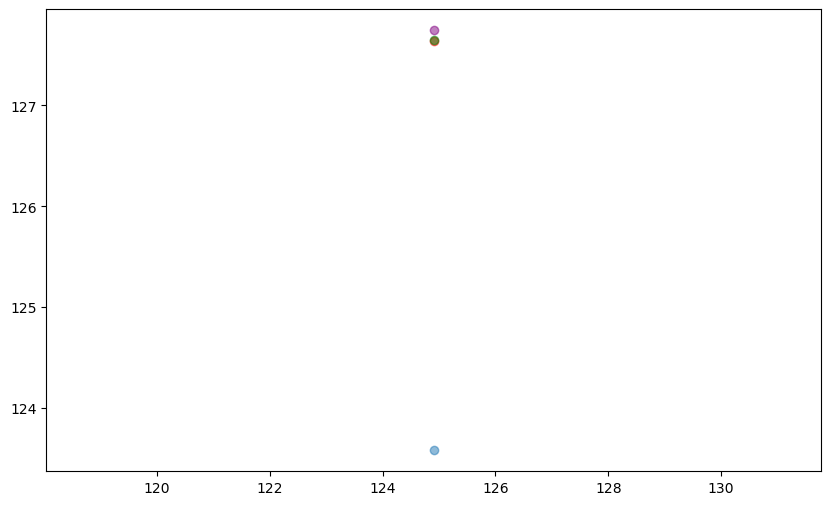

In [77]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Close_Lag1'], y_test, label="Actual", alpha=0.5)  # Plotting against 'Close_Lag1'
plt.scatter(X_test['Close_Lag1'], y_pred_linear, label="Linear Regression", color='red', alpha=0.5)
plt.scatter(X_test['Close_Lag1'], y_pred_ridge, label="Ridge Regression", color='green', alpha=0.5)
plt.scatter(X_test['Close_Lag1'], y_pred_lasso, label="Lasso Regression", color='purple', alpha=0.5)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


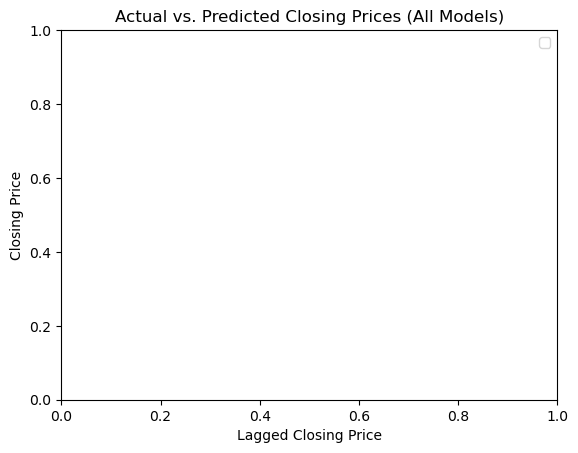

In [79]:
plt.xlabel("Lagged Closing Price")
plt.ylabel("Closing Price")
plt.title("Actual vs. Predicted Closing Prices (All Models)")
plt.legend()
plt.show()